## Principal Component Analysis
This notebook uses Principal Component Analysis, a linear dimensional reduction of data, to observe the three possible states of an Ising Lattice: polarized up spin, polarized down spin, and unpolarized.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [26]:
# Preparing Data
data = pd.read_csv('20_unknown.csv', index_col=0) # Download a premade data set
d = data.values
t = d[:,0]
d = d[:,1:]

In [27]:
# Center and Scale the Data. Avg value will be 1 and the standard dev will be 1.
scaled_data = preprocessing.scale(d)
# Notice the thing is transposed
# sklearn calculated standard dev as population, not sample

# Performs PCA
pca = PCA()
pca.fit(scaled_data)
pca_data= pca.transform(scaled_data)
print(pca_data.shape)

(1400, 400)


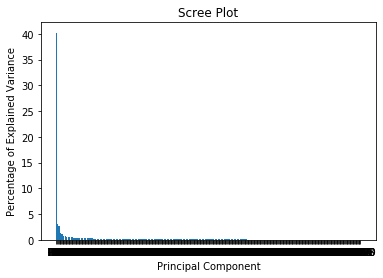

In [28]:
# Graphing Percentage of Variance for each PC
per_var = np.round(pca.explained_variance_ratio_* 100, decimals= 1) # Calculates the percentage of variance for each PC
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)] # labels for each PC

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

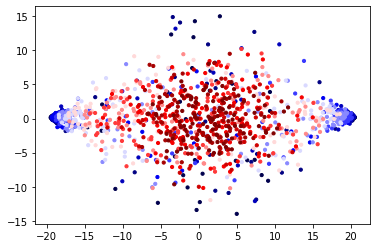

In [34]:
# Plot PC1 against PC2
pcaDF = pd.DataFrame(pca_data, columns = labels)
#print(pcaDF)

plt.scatter(pcaDF.PC1, pcaDF.PC2, c=t, cmap= "seismic", s = 10)
plt.show()